In [4]:
import pandas as pd
import altair as alt

%matplotlib inline

# produce vector inline graphics
from IPython.display import set_matplotlib_formats, display, Markdown, HTML

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

set_matplotlib_formats('pdf', 'svg')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 4]
display(HTML("<style>.container { width:70% !important; }</style>"))

import numpy as np

In [47]:
dft = pd.read_csv('https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv')
dft['Click_labeled'] = dft['Clicked on Ad'].apply(lambda x: "Click" if x == 1 else "No Click")
dft.head(20)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Click_labeled
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,No Click
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,No Click
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,No Click
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,No Click
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,No Click
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,No Click
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0,No Click
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1,Click
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0,No Click
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0,No Click


In [70]:
# df = pd.read_csv('https://raw.githubusercontent.com/shubham13p/Ad-Click-Prediction/master/advertising.csv')
df = pd.read_csv('../owid-covid-data.csv')
# df['Click_labeled'] = df['Clicked on Ad'].apply(lambda x: "Click" if x == 1 else "No Click")
df.head(20)
# df1=df.replace('?',np.NaN)
# df1.head()
# df.describe(include = "all")
# df.info()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [76]:
df[['continent','date', 'new_cases_smoothed']]
gdp=df.groupby('location')['gdp_per_capita'].mean()
df_gdp=gdp.sort_values(ascending = False)
df_gdp

location
Qatar            116935.600
Luxembourg        94277.965
Singapore         85535.383
Brunei            71809.251
Ireland           67335.293
                    ...    
Somalia                 NaN
South America           NaN
Syria                   NaN
Taiwan                  NaN
Vatican                 NaN
Name: gdp_per_capita, Length: 210, dtype: float64

In [58]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

iso_code
False    64889
True      3006
Name: iso_code, dtype: int64

continent
False    64495
True      3400
Name: continent, dtype: int64

location
False    67895
Name: location, dtype: int64

date
False    67895
Name: date, dtype: int64

total_cases
False    67152
True       743
Name: total_cases, dtype: int64

new_cases
False    67150
True       745
Name: new_cases, dtype: int64

new_cases_smoothed
False    66149
True      1746
Name: new_cases_smoothed, dtype: int64

total_deaths
False    58282
True      9613
Name: total_deaths, dtype: int64

new_deaths
False    58440
True      9455
Name: new_deaths, dtype: int64

new_deaths_smoothed
False    66149
True      1746
Name: new_deaths_smoothed, dtype: int64

total_cases_per_million
False    66400
True      1495
Name: total_cases_per_million, dtype: int64

new_cases_per_million
False    66397
True      1498
Name: new_cases_per_million, dtype: int64

new_cases_smoothed_per_million
False    65407
True      2488
Name: new_cases_smoothed_per_

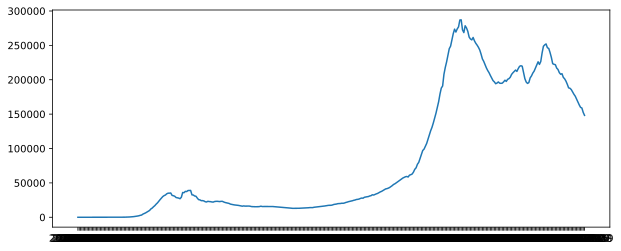

In [69]:
# top10_confirmed = df.groupby('location')['new_cases'].sum().nlargest(20).sort_values(ascending = False)
asia = df[df["continent"] == "Asia"]
europe = df[df["continent"] == "Europe"]

top10_confirmed = europe.groupby('date')['new_cases_smoothed'].sum()
DF = pd.DataFrame(top10_confirmed)
DF['date'] = DF.index
DF.reset_index(drop=True, inplace=True)
DF
plt.plot(list(DF['date']),list(DF['new_cases_smoothed'])) 


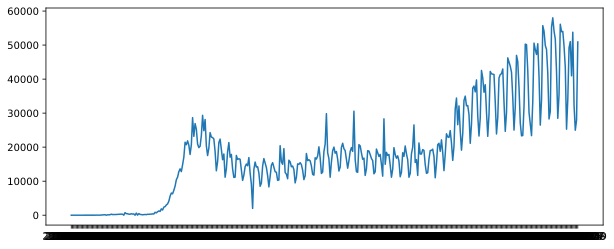

In [44]:
# top10_confirmed = df.groupby('location')['new_cases'].sum().nlargest(20).sort_values(ascending = False)
top10_confirmed = df.groupby('date')['new_deaths'].sum()
DF = pd.DataFrame(top10_confirmed)
DF['date'] = DF.index
DF.reset_index(drop=True, inplace=True)
DF
plt.plot(list(DF['date']),list(DF['new_deaths'])) 


In [68]:
top10_confirmed = asia.groupby('location')['new_cases'].sum().nlargest(20).sort_values(ascending = False)
top10_confirmed.index
# bars = (alt.Chart(top10_confirmed, width=800, title='new case by month').mark_bar(width=100)
#  .encode(
#      alt.X('month(date):O', title=''),
#      y=alt.Y('mean(new_cases):Q', title='', axis=alt.Axis(labels=False))
#  ))
# text = bars.mark_text(
#     align='center',
#     baseline='middle',
#     dy=20,
#     color='white',
#     size=20
# ).encode(
#     text=alt.Text('mean(new_cases):O', format=('.2f'))
# )

# (bars + text).configure_axis(labelAngle=0, labelFontSize=20).configure_title(fontSize=20)

Index(['India', 'Turkey', 'Iran', 'Indonesia', 'Israel', 'Iraq', 'Pakistan',
       'Philippines', 'Bangladesh', 'Japan', 'Saudi Arabia', 'Jordan',
       'United Arab Emirates', 'Lebanon', 'Nepal', 'Georgia', 'Malaysia',
       'Kazakhstan', 'Azerbaijan', 'Kuwait'],
      dtype='object', name='location')

## Density plots

Let's just take a look at the *density plots* of a few of these columns. These are like histograms, but smoothed. 

This gives us a quick view on distributions within our data. We see the following:

* Most users seem to be around 30 years old, but we have a pretty broad distribution overall .
* We see two "peaks" (or modes) in the daily usage features. This might mean we have two meaningful and distinct usage patterns.
* We'll be interested in age and usage as we continue our investigation of click rates.

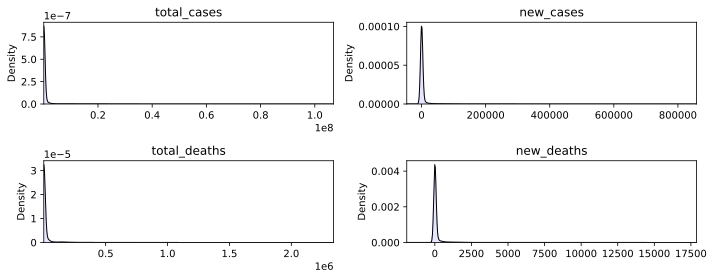

In [11]:
cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths']

fig, axs = plt.subplots(2, 2)
for ix, col in enumerate(cols):
    row = ix // 2
    column =  ix % 2
    
    plt.tight_layout()
    
    ax = axs[row][column]
    
    
    df[[col]].plot.kde(title=col, 
                       legend=False, 
                       color='black',
                       ax = ax,
                       linewidth=1)
    
    ax.set_xlim(df[col].min(), df[col].max())
    ax.set_ylim(0)
    
    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]

    # Get the xy data from the lines so that we can shade
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax.fill_between(x1,y1, color="blue", alpha=0.1)

## Interactive plots with Altair


For more compelling and illuminating charts, we want to bring in some interactivity. 

For this, we'll use a package called [Altair](https://altair-viz.github.io/gallery/). There is no "best" visualization library, just different tools for different jobs. Here's a brief rundown of why I sometimes use Altair.

**Advantages of Altair**
* Quickly produce interactive, linked visualizations within Jupyter notebooks
* Easily transfer these visualizations to other web apps or contexts
* Interactivity runs client-side with JavaScript, so it works even on a static page (like in GitHub Pages)

**Disadvantages of Altair**
* Not very powerful or flexible as compared to things like Bokeh, Plotly, or D3
* Not as well-documented or developed as things like Matplotlib

### Temporal effects

In [4]:
bars = (alt.Chart(df, width=800, title='Click rate by month').mark_bar(width=100)
 .encode(
     alt.X('month(Timestamp):O', title=''),
     y=alt.Y('mean(Clicked on Ad):Q', title='', axis=alt.Axis(labels=False))
 ))
text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=20,
    color='white',
    size=20
).encode(
    text=alt.Text('mean(Clicked on Ad):O', format=('.2f'))
)

(bars + text).configure_axis(labelAngle=0, labelFontSize=20).configure_title(fontSize=20)

alt.LayerChart(...)

## Age, time on site, click rate

Here, we're going to use a linked, interactive pair of charts to investigate how these three variables interact.

### What do we mean by "linked?"
* We can make a selection in each chart (try clicking and dragging).
* Notice how the selection in one chart modifies the data shown in the other.
* This is because both charts share a *view* on our underlying data.

### Why is this helpful?
* We want to communicate a multi-dimensional relationship here: there are distinct usage patterns by age, and we see that age and "time on site" both influence click rate. How is age tied to "time on site", though? An interactive chart makes it easy for the users to *find this out themselves*.

In [5]:
brush = alt.selection_interval(encodings=['x'], empty='all')
brush2 = alt.selection_interval(encodings=['x'], empty='all')

domain = ['No Click', 'Click']
range_ = ['lightgray', 'orange']

bars1 = alt.Chart(df).mark_bar().encode(
    x=alt.X('Daily Time Spent on Site:Q', bin=True),
    color='Click_labeled:N',
    y='count(Click_labeled):N'
).add_selection(
    brush
).transform_filter(
    brush2
).properties(
    title='Less time = More Clicks'
)

bars = alt.Chart(df).mark_bar().encode(
    x=alt.X('Age:Q', scale=alt.Scale(domain=(10, 65))),
    color=alt.Color('Click_labeled:N', scale=alt.Scale(domain=domain, range=range_)),
    y=alt.Y('count(Click_labeled):N', scale=alt.Scale(domain=(0, 62))),
).transform_filter(
    brush
).add_selection(
    brush2
).properties(
    title='Older = higher click rate'
)

(bars | bars1).configure_title(
    fontSize=20,
    anchor='start')

alt.HConcatChart(...)

### Another view on Age vs time on site

* Here, we make a stacked histogram of age and time on site. This communicates only *some* of the information in the charts above. Notably, we no longer tie this information to the click rate, which is the quantity we actually care about. 
* What do we conclude from this chart? What do these results actually **mean** with regards to the click rate? 
* We can somewhat observe that the younger groups increase at/around 70 minutes, but not as clearly as in the charts above.

In [6]:
bars = (alt.Chart(df).mark_bar()
 .encode(
     x=alt.X('Daily Time Spent on Site', bin=alt.Bin(maxbins=14)),
     y=alt.Y('count(Daily Time Spent on Site)', title=''),
     color=alt.Color('Age', 
                     scale=alt.Scale(scheme='viridis', reverse=True),
                     bin=alt.Bin(maxbins=10)))
 
 .properties(title='Over 70 minutes on site = younger users')
)


bars.configure_title(fontSize=20)

alt.Chart(...)

### Month and age

In [7]:
(alt.Chart(df, width=800, title='Age vs Month, Counts').mark_bar(width=100)
 .encode(
     alt.X('month(Timestamp):O', title=''),
     y=alt.Y('count(Clicked on Ad):Q', title='', axis=alt.Axis(labels=False)),
     color=alt.Color('Age', 
                         scale=alt.Scale(scheme='viridis', reverse=True),
                         bin=alt.Bin(maxbins=10))
 ).configure_axis(labelAngle=0, labelFontSize=20)).configure_title(fontSize=20)



alt.Chart(...)

## Topic Modeling

Here, we will try to get relevant topics from the ad text.

We'll use [Non-negative Matrix Factorization (NMF)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) to split the ad text into 3 topics.



In [8]:
tfidf_vect = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = tfidf_vect.fit_transform(df['Ad Topic Line'].values.astype('U'))

In [9]:
nmf = NMF(n_components=3, random_state=42)
nmf.fit(doc_term_matrix )

topic_values = nmf.transform(doc_term_matrix)
df['Topic'] = topic_values.argmax(axis=1)

In [10]:
nmf_components = nmf.components_
feature_names = tfidf_vect.get_feature_names()

divs = []

for i,topic in enumerate(nmf.components_):
    

    num_ads = len(df[df['Topic']==i])
    top_5 = [feature_names[i] for i in topic.argsort()[-5:]]  
    top = ''.join([f'* {word} \n' for word in  top_5])

    markdown = f'''<div style="width: 33%; float: left;"> 
    
### Topic #{i+1}

**Number of Ads in Topic:** {num_ads}

{top}

</div>
''' 
    
    divs.append(markdown)
    
display(Markdown(''.join(divs)))

<div style="width: 33%; float: left;"> 
    
### Topic #1

**Number of Ads in Topic:** 666

* customer 
* solution 
* based 
* oriented 
* focused 


</div>
<div style="width: 33%; float: left;"> 
    
### Topic #2

**Number of Ads in Topic:** 148

* structure 
* interface 
* user 
* state 
* multi 


</div>
<div style="width: 33%; float: left;"> 
    
### Topic #3

**Number of Ads in Topic:** 186

* configurable 
* desk 
* thinking 
* secured 
* line 


</div>


### Topics and click rate

In [11]:
base = (alt.Chart(df, width=400).mark_bar()
 .encode(
     x=alt.X('Topic:N', axis=alt.Axis(labelAngle=0,
                                        labelFontSize=16,
                                        titleFontSize=20,
                                        labelColor='gray',
                                        titleColor='gray')),
     y=alt.Y('mean(Clicked on Ad)', axis=alt.Axis(labels=False, title='')))
 
 .properties(title='No clear difference between topics and click rates'))


bars = base.encode(color=alt.Color('Topic:N', 
                         scale=alt.Scale(scheme='viridis', reverse=True)))

text = base.mark_text(
    align='center',
    baseline='middle',
    dy=20,
    color='white',
    size=24
).encode(
    text=alt.Text('mean(Clicked on Ad):O', format=('.2f'))
)

topic_age = (alt.Chart(df[df['Clicked on Ad']==True], width=400).mark_bar()
 .encode(
     x=alt.X('Age:Q', bin=True, axis=alt.Axis(labelAngle=0,
                                        labelFontSize=16,
                                        titleFontSize=20,
                                        labelColor='gray',
                                        titleColor='gray')),
     y=alt.Y('count()', axis=alt.Axis(labels=False, title='')),
     color=alt.Color('Topic:N', 
                         scale=alt.Scale(scheme='viridis', reverse=True)))
 
 .properties(title='Count of Ad Clicks by Topic and Age'))



((bars + text ) | topic_age).configure_title(fontSize=20)

alt.HConcatChart(...)